# 挑戰：分析有關數據科學的文本

在這個例子中，我們將進行一個簡單的練習，涵蓋傳統數據科學流程的所有步驟。你不需要撰寫任何程式碼，只需點擊下面的單元格執行它們並觀察結果。作為挑戰，鼓勵你使用不同的數據來嘗試這段程式碼。

## 目標

在這節課中，我們討論了與數據科學相關的不同概念。現在讓我們通過進行一些**文本挖掘**來探索更多相關概念。我們將從一段有關數據科學的文本開始，提取其中的關鍵字，然後嘗試將結果可視化。

作為文本，我們將使用維基百科上有關數據科學的頁面：


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## 第一步：獲取資料

每個資料科學流程的第一步就是獲取資料。我們將使用 `requests` 函式庫來完成這個步驟：


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## 步驟 2：轉換資料

下一步是將資料轉換成適合處理的形式。在我們的案例中，我們已經從網頁下載了 HTML 原始碼，現在需要將其轉換為純文字。

有許多方法可以完成這個任務。我們將使用 Python 中最簡單的內建物件 [HTMLParser](https://docs.python.org/3/library/html.parser.html)。我們需要繼承 `HTMLParser` 類別，並定義程式碼來收集 HTML 標籤內的所有文字，但要排除 `<script>` 和 `<style>` 標籤中的內容。


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## 第三步：獲取洞察

最重要的一步是將我們的數據轉化為可以提取洞察的形式。在我們的案例中，我們希望從文本中提取關鍵字，並了解哪些關鍵字更具意義。

我們將使用一個名為 [RAKE](https://github.com/aneesha/RAKE) 的 Python 函式庫來進行關鍵字提取。首先，如果尚未安裝這個函式庫，我們需要先安裝它：


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


主要功能可從 `Rake` 對象獲得，我們可以使用一些參數來自定義。在我們的例子中，我們將關鍵字的最小長度設置為 5 個字符，關鍵字在文檔中的最小頻率設置為 3，關鍵字中的最大單詞數設置為 2。可以隨意嘗試其他值並觀察結果。


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

我們獲得了一份術語清單，並附有其相關的重要性程度。如你所見，最相關的學科，例如機器學習和大數據，位於清單的頂部位置。

## 第四步：結果的可視化

人們通常能以視覺形式最有效地解讀數據。因此，將數據進行可視化以獲取一些洞察通常是有意義的。我們可以使用 Python 中的 `matplotlib` 庫來繪製關鍵字及其相關性的簡單分佈圖：


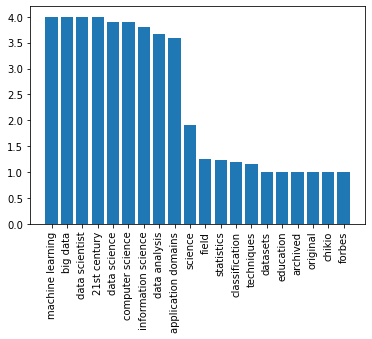

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

然而，還有一種更好的方式來可視化詞頻——使用**文字雲**。我們需要安裝另一個庫來從我們的關鍵詞列表中繪製文字雲。


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud` 物件負責接收原始文本或預先計算的單詞及其頻率列表，並返回一個圖像，之後可以使用 `matplotlib` 顯示：


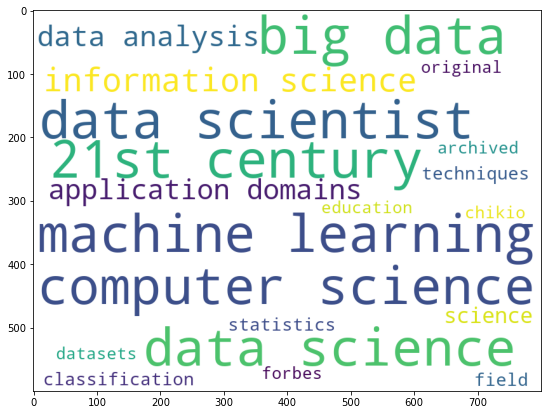

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

我們也可以將原始文本傳遞給 `WordCloud` - 讓我們看看是否能夠得到類似的結果：


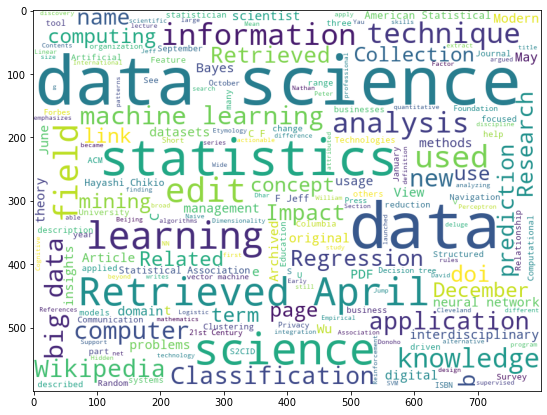

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

你可以看到，現在的文字雲看起來更吸引人，但同時也包含了許多雜訊（例如像 `Retrieved on` 這樣無關的詞語）。此外，我們獲得的雙詞關鍵字（例如 *data scientist* 或 *computer science*）也變少了。這是因為 RAKE 演算法在從文本中選取優質關鍵字方面表現得更出色。這個例子說明了資料前處理和清理的重要性，因為最終清晰的結果能幫助我們做出更好的決策。

在這個練習中，我們簡單地從維基百科的文本中提取了一些意義，以關鍵字和文字雲的形式呈現。這個例子雖然相對簡單，但很好地展示了資料科學家在處理資料時會採取的所有典型步驟，從資料獲取到視覺化。

在我們的課程中，我們將詳細討論這些步驟。



---

**免責聲明**：  
本文檔已使用 AI 翻譯服務 [Co-op Translator](https://github.com/Azure/co-op-translator) 進行翻譯。我們致力於提供準確的翻譯，但請注意，自動翻譯可能包含錯誤或不準確之處。原始語言的文件應被視為權威來源。對於關鍵信息，建議尋求專業人工翻譯。我們對因使用此翻譯而引起的任何誤解或誤釋不承擔責任。
